<center><font size="+4">Introduction to Programming and Data Processing 2020/2021</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20202021/raw/main/IPDP/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="The extensible parallel architecture of MultiVeStA"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Daniele Licari d.licari@santannapisa.it</font></center>

---

<center><font size="+4">Module 6: Modules,</font></center>
<br/>
<center><font size="+4"> Exceptions & OO Programming</font></center>
<center><font size="+2"> With applications to Financial Betting Markets</font></center>

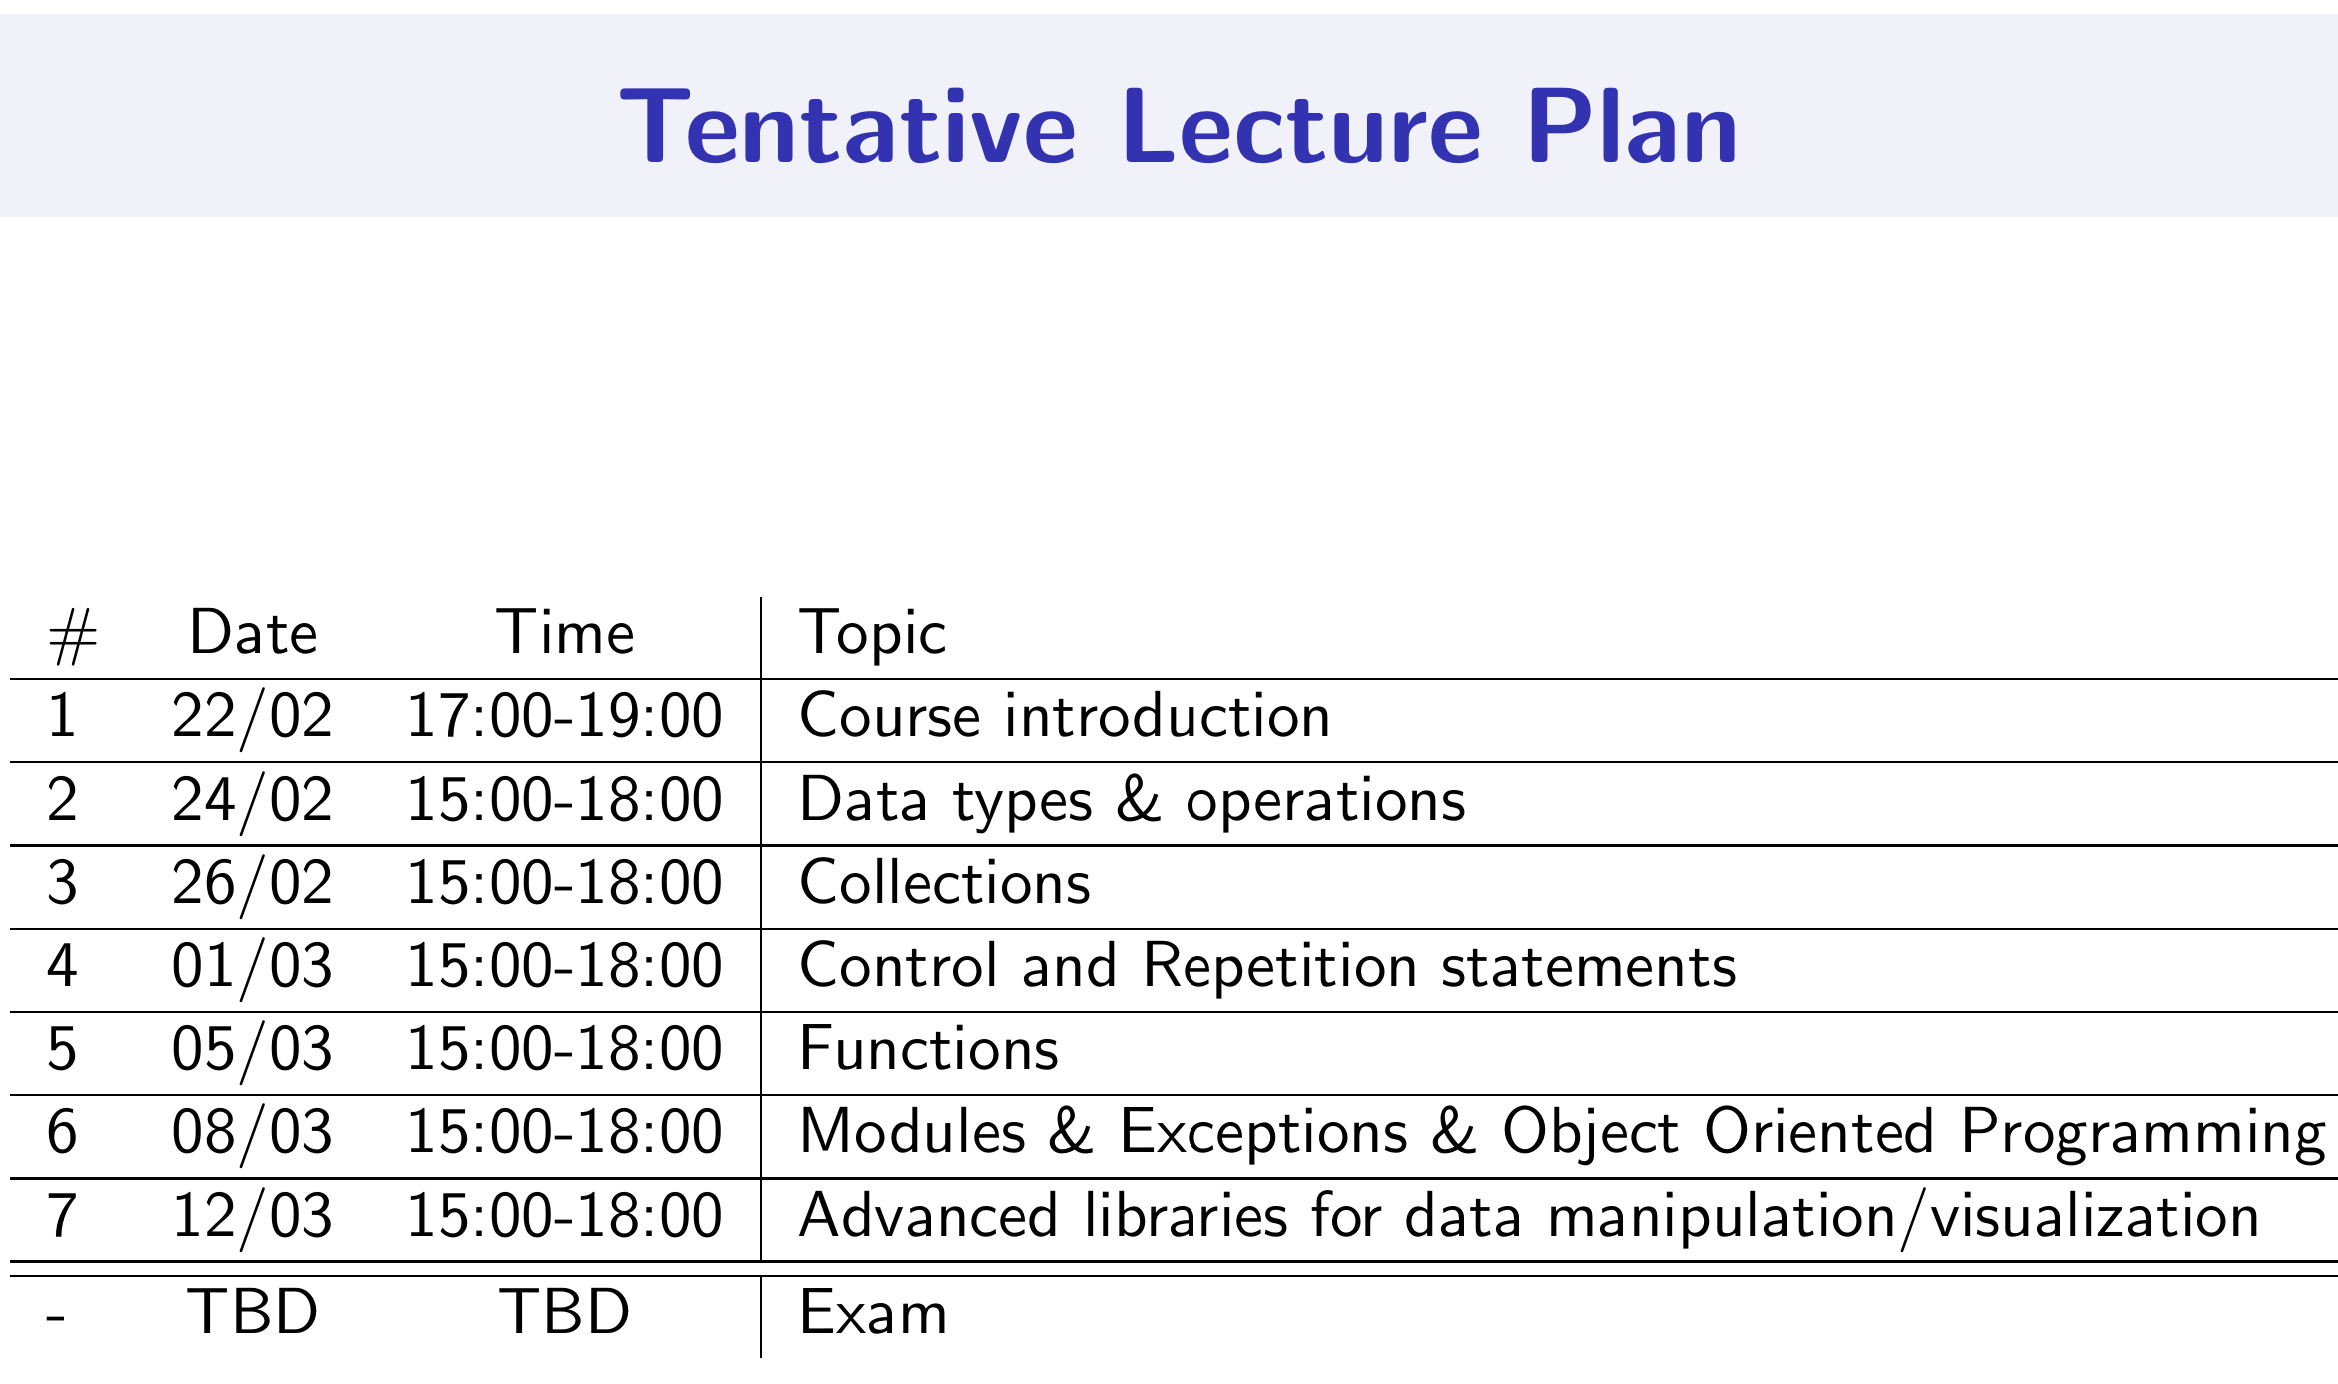

In [39]:
from IPython.display import Image, display
img=Image(filename='images/tentativeLecturePlan.png',width=800)
display(img)

# Women in Computer Science

Computer science has a big problem
- Not enough women work (in industry or academia) on it
- One of the reasons is that not many female students enroll in CS program
  - Perhaps because it is perceived as 'non-attracting topic' by women
    - __but CS indeed is something for women__
    - __and many women contributed to it__

Two notable examples:
1. [Ada Lovelace](https://en.wikipedia.org/wiki/Ada_Lovelace), 1815-1852, UK
    - Mathematician, but known as (one of) the __first *software* developer in history__
    - She published what many consider the first __computer program__ 
       - An _algorithm_ executable on a mechanical machine
       
2. [Grace Hopper](https://en.wikipedia.org/wiki/Grace_Hopper), 1906-1992, USA
    - Computer scientist (actually, PhD in mathematics from Yale University) and US Navy rear admiral. 
    - Pioneer of computer programming who invented 
      - the first compiler in 1952 to translate mathematical code into machine-readable code.
      - one of the first high-level programming languages in 1956, Flow-Matic

# Importing Modules

As discussed several times, it is very important to structure your programs
* A Python program might consist of (code from) multiple files
* Each file is seen as a separate _module_ that can be imported in the current one

## Import Python modules

Does this ring a bell to you?
* We already imported many _predefined python modules_ in the previous classes.

For example...

In [ ]:
import csv
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import Image, display
img=Image(filename='images/tentativeLecturePlan.png',width=300)
display(img)

What is the role of the `from` keyword?
* It allows you to specify functions or types of interest that you want to import
  * You will import only them
  * You will not need to specify the name of the module everytime you use the imported functions/types

In [ ]:
import IPython.display
img=IPython.display.Image(filename='images/tentativeLecturePlan.png',width=300)
IPython.display.display(img)

## Import Python modules from local Python files (created by you)

Importing Python code defined in Python files (i.e., with extension .py) is rather simple
* We have created a very simple Python file (i.e., a file with extension .py)
  * Do not confuse a Python file (.py) with a jupyter notebook (.ipynb)

The file is [test_import_py.py](test_import_py.py)
* We just need to write the following

In [1]:
import test_import_py

Successfully imported!


After this, we can use any type or function defined in the file

In [2]:
test_import_py.my_function()

Successfully imported!


In [3]:
my_function()

NameError: name 'my_function' is not defined

If you don't want to specify the name of the file everytime you use the function
* Then explicitly import the function!

In [4]:
from test_import_py import my_function

In [5]:
my_function()

Successfully imported!


What if the Python file is not in the folder of the current notebook?
* e.g. [otherpath/test_import_py_Copy1.py](otherpath/test_import_py_Copy1.py)
* Just specify the relative path of Python file using '.' as separator

In [6]:
#otherpath/test_import_py_Copy1.py
import otherpath.test_import_py_Copy1
otherpath.test_import_py_Copy1.my_function_in_otherpath()

Successfully imported from otherpath!


Finally, note that if you don't like the name of the module
* e.g. because it is too long
* you can load and rename it as we did above with matplotlib

In [ ]:
import otherpath.test_import_py_Copy1 as tic
tic.my_function_in_otherpath()

**Note** For efficiency reasons, each module is only imported once per interpreter session. 
Therefore, if you change your modules, you must restart the interpreter – or, if it’s just one module you want to test interactively, use importlib.reload(), e.g. 

```
import importlib
importlib.reload(modulename)
```

## Import Jupyter Notebooks

__Jupyter notebooks are not python files__
* They are collections of textual (markdown) and code (Python) cells

Let us import [test_import_nb.ipynb](test_import_nb.ipynb)

Until recently, importing jupyter notebooks required some hacks
* But thanks to the module ipynb, it became as easy as importing python files
  * [Official documentation](https://ipynb.readthedocs.io/en/stable/)
  * [Stackoverflow](https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file)


A very simple way is the following

In [ ]:
import sys
!"{sys.executable}" -m pip install ipynb

In [8]:
#Imports just functions and classes
from ipynb.fs.defs.test_import_nb import *
#or simply
#import ipynb.fs.defs.test_import_nb

#Imports just a function
#from ipynb.fs.defs.test_import_nb import my_function_nb

#Imports everything, including top-level statements (which are executed)
#from ipynb.fs.full.test_import_nb import *
#import ipynb.fs.full.test_import_nb

In [ ]:
#Old 'hack' way
#%run test_import_nb.ipynb

This has the effect of implicitly copying the content of the file 'test_import_nb.ipynb' in this notebook
* Therefore now you can just invoke any function defined in the _other_ notebook

In [9]:
my_function_nb()
my_function_nb2()

Successfully imported from notebook!
Successfully imported from notebook 2!


my_function_nb2()

# Exceptions and exception handling

There are two types of _errors_ in programs
* __Compile-time__ errors: detected while you write the program
  * The Python interpreter complains __before executing your program__ if you wrote a __syntactically wrong__ Python program
* __Run-time__ errors: detected while the program is executed
  * Your program is syntactically correct, but there might be __unexpected problems__ for certain inputs, e.g. 
    * if you try dividing by zero
    * if you try accessing an index in a list/str beyond its actual size

In [10]:
def divide(n,d):
    res = n/d
    return res 

#print(divide(4,2))
#d=int(input())
#print(divide(4,d))

2.0


In [11]:
print(divide(4,0)) #ERROR!
print('This code will NOT be executed because we do not recover from errors.')

ZeroDivisionError: division by zero

In [14]:
my_str = "ciao"
print(my_str[3])
#print(my_str[4])#ERROR!

o


All modern programming languages provide a machinery to _catch_, handle and recover from such unexcepted __exceptional__ cases
* [__Exception handling__](https://docs.python.org/3/tutorial/errors.html)

Exception handling is thus a way to make your program robust to unexpected events (e.g. inputs)

## Catching Exceptions

### Try and except

In [16]:
try:
    #print(divide(4,2))
    #print(divide(4,0))#HANDLED ERROR!
    print(divide(4,'ciao'))#HANDLED ERROR!
except ZeroDivisionError:
    print('You tried dividing by zero!')
except TypeError as e:
    print('The function divide requires two numeric data types!')
    print('This is the thrown exception:',e)

print('')
print('This code will be executed because we catch and recover from errors.')

The function divide requires two numeric data types!
This is the thrown exception: unsupported operand type(s) for /: 'int' and 'str'

This code will be executed because we catch and recover from errors.


In [17]:
whattodo = 'continue'
i=1
while whattodo != 'stop':
    print('Give me numerator and denominator, in two lines')
    try:
        n = int(input())
        d = int(input())
        print(divide(n,d))
        whattodo = input("Write 'stop' if you want to terminate")
    except ZeroDivisionError:
        print('You tried dividing by zero. Try again')
    except ValueError:
        print('The function divide requires two int. Try again')
    print('Iteration',i,'completed')
    print()

Give me numerator and denominator, in two lines


 2
 0


You tried dividing by zero. Try again
Iteration 1 completed

Give me numerator and denominator, in two lines


 2
 0


You tried dividing by zero. Try again
Iteration 1 completed

Give me numerator and denominator, in two lines


 2
 1


2.0


Write 'stop' if you want to terminate stop


Iteration 1 completed



Did you notice what happens after an exception happen in line `print(divide(n,d))`?
1. We jump to the correct `except` branch
   * The one for the type of the thrown exception
   * We skip any instruction after the one raising the exection
     * __We don't get asked whether we want to stop!__
2. We execute the body of the `except`
3. We continue executing the next instruction after the `try`-`except` statement

### The finally block

The try-catch statements allows for a `finally` clause
* Code that will be always executed
  * If an exception has been thrown
  * If no exception has been thrown

With the following change we are guaranteed that we will always be asked wheter we want to continue or not
* Even if we remove the except

In [18]:
whattodo = 'continue'
i=0
while whattodo != 'stop':
    try:
        print('Give me numerator and denominator, in two lines')
        n = int(input())
        d = int(input())
        print(divide(n,d))
    except ZeroDivisionError:
         print('You tried dividing by zero. Try again')
    except ValueError:
        print('The function divide requires two int. Try again')
    finally:
        whattodo = input("Write 'stop' if you want to terminate")
        i+=1
    print('Iteration',i,'completed')
    print()    

Give me numerator and denominator, in two lines


 2
 0


You tried dividing by zero. Try again


Write 'stop' if you want to terminate stop


Iteration 1 completed



The finally clause is particularly useful when using external resources that have to be dealt with no matter what
* The classic example is a file we are reading/writing

In [ ]:
# Open a file to write in it (appending to previous text (a))
file = open('data.txt', 'a')
try:
    for i in range(2):
        print('Give me numerator and denominator, in two lines')
        n = int(input())
        d = int(input())
        res=divide(n,d)
        file.write(str(res))
        file.write('\n')
finally:
    print('Closing the file')
    file.close()
print('This code will not be executed in case of exception, But we have the guarantee to have closed the file.')

#file.write("I can't write on a closed file") #ERROR

Closing a file is __so important__ that 
- python provides a command that does it automatically!
- we have seen this in the previous two classes
  - the [`with` statement](https://www.geeksforgeeks.org/with-statement-in-python/)
  - it automatically __implicitly__ adds a `finally` statement to close the file
  
  
>__ALWAYS USE WITH WHEN WORKING WITH FILES__  

In [ ]:
# using with statement 
with open('hello.txt', 'a') as file: 
    file.write('hello world !')

__File I/O__

As a side-product, in the block above we have shown how to [read and write on a file](https://www.guru99.com/reading-and-writing-files-in-python.html). 
1. First we need to open it, specifying what we want to do with it
   * `'a'`  stands for: I want to write on the file, appending to the text present in it, if any. The file will be created if it does not exist
   * `'w'`  stands for: I want to write on the file, overwriting the text present in it, if any. The file will be created if it does not exist        
   * `'r'`  stands for: I want to read on the file. An exception is thrown if the file does not exist
   * `'w+'` and 'a+' are like 'w' and 'a', resp., but they additionally allow to read from the file
2. There are methods to read from/write to files
   * Methods write(str) and writelines(lst) allows you to write on a file
   * Methods read(str) and readlines(lst) allows you to read from a file
3. Finally you have to close the file 

In [19]:
file = open('data.txt', 'r')
lines = file.readlines()
print(type(lines))
for line in lines:
    print(line)
file.close()    

<class 'list'>
0.5



In [ ]:
with open('data.txt', 'r') as file: 
    lines = file.readlines()
    print(type(lines))
    for line in lines:
        print(line)

### The else block

We can also use an `else` block which is executed if no exeption is thrown

In [ ]:
try:
    4/0
    #4/2
except ZeroDivisionError:
    print('Division by zero')
else:
    print('No exception')
finally:
    print('No matter what, this block will be executed')

## Raising exceptions

The exception handling mechanism also allows us to throw exceptions
* This is useful in many occasions
* But don't abuse of this feature!
  * Exceptions are for exceptional cases
  * Exaggerating with their use will make your program
    * Less efficient
    * More obfuscated, and therefore less manutenable

In [20]:
raise ZeroDivisionError 

ZeroDivisionError: 

In [21]:
try:
    raise ZeroDivisionError 
except ZeroDivisionError:
    print('The exception has been thrown')

The exception has been thrown


Don't abuse of this mechanism
- Exceptions should be used only for exceptional cases.

## Exception propagation

If an exception is thrown within a function which does not handle it
* It will be propagated to the caller of the function. It this does not handle it
  * It will be propagated to the caller of the caller of the function 
    * And so on, until we reach the top level of execution

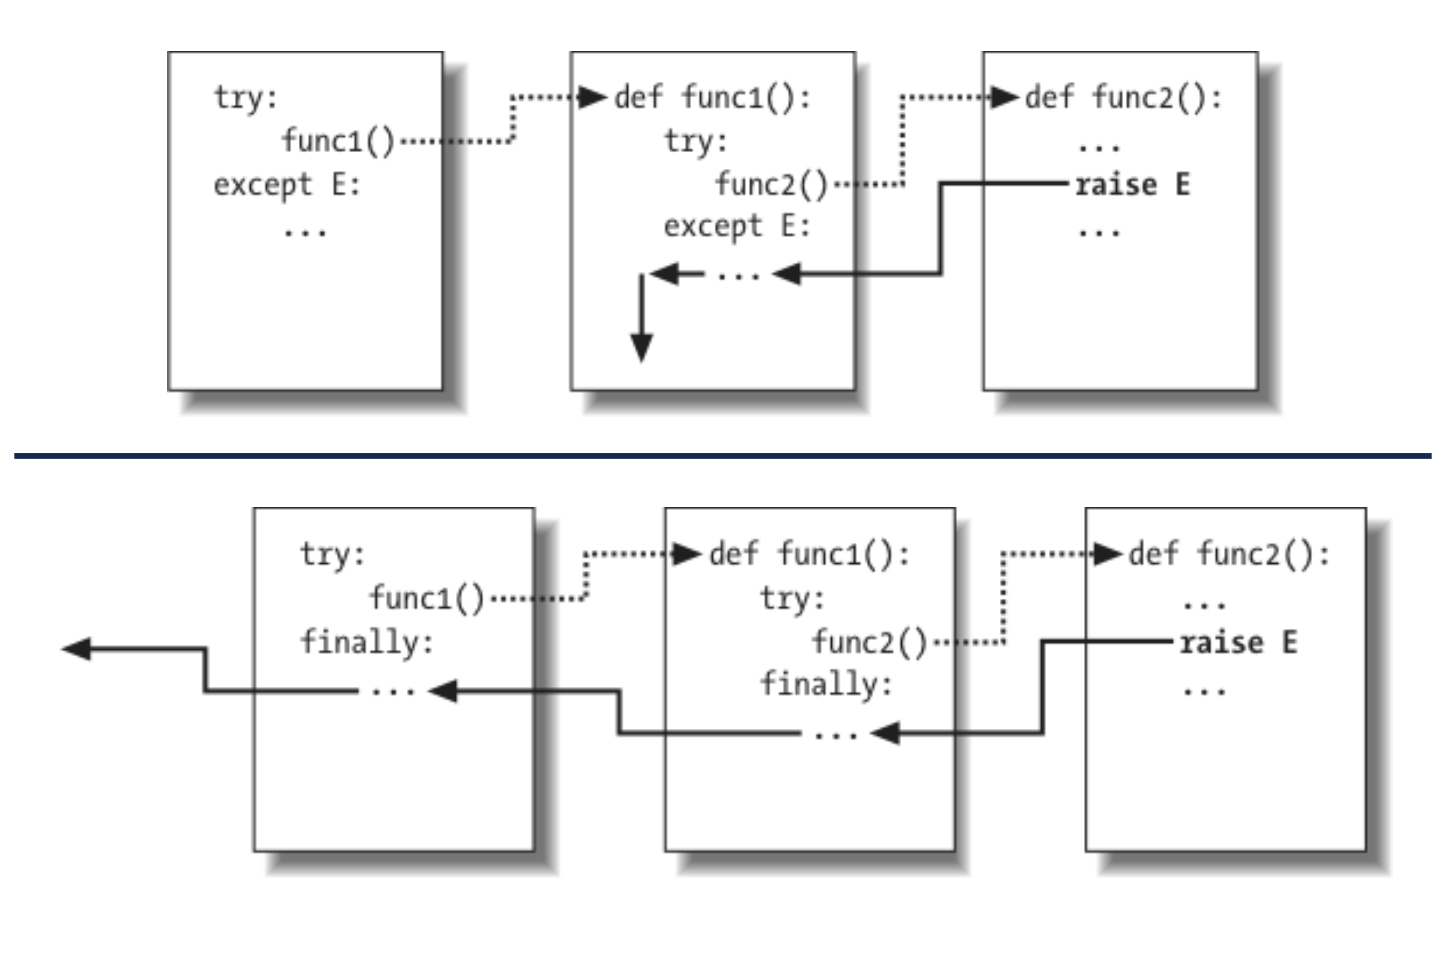

In [22]:
from IPython.display import Image, display
img=Image(filename='images/exceptionPropagation.png',width=800)
display(img)

In [23]:
def func1():
    try:
        func2()
    except ZeroDivisionError:
        print('In func1 I detected a ZeroDivisionError exception')
        
def func2():
    raise ZeroDivisionError
        

try:
    func1()
except ZeroDivisionError:
    print('In the top-level I detected a ZeroDivisionError exception')

In func1 I detected a ZeroDivisionError exception


In [24]:
def func1():
    try:
        func2()
    finally:
        print('Finally of func1')
        
def func2():
    raise ZeroDivisionError
        

try:
    func1()
finally:
    print('Finally of top-level')

Finally of func1
Finally of top-level


ZeroDivisionError: 

Image and example by Prof. Mirco Tribastone, IMT School for Advanced Studies Lucca, Italy

> The [exception handling machinery of Python](https://docs.python.org/3/tutorial/errors.html) is actually richer than this
> * But in this course we will not investigate this aspect any further

# Object-oriented Programming

In the previous class we discussed how to modularize a program into _functions_

Functions
* are self-contained units of login with input/output
* enable _procedural programming_

We now 
* __bring modularization to the next level__
* show how programs can can be further modularized using OOP


__Object-oriented Programming__ is a programming paradigm 
* which allows to transform the problem at hand into a set of interacting objects (or agents)
  * therefore much easier for us to visualize and reason about
* which naturally leads to modularized software
* extremely popular in industry
  * because _it is easier to program using objects_
    * therefore developers are much more productive

Examples of programming languages supporting OOP
- Python, Java, C#, C++, [R](https://data-flair.training/blogs/object-oriented-programming-in-r/)

Examples of programming languages NOT supporting OOP
- C

## Classes

Before talking about objects we need to talk about classes
* Intuitively, a class defines a new type
* Every instance of such a type is an object
  * A class is the type of an object
  * A class specifies the _structure_ of every object of such class

A class, e.g. `Individual`, specifies
* The type of data that every object of class `Individual` will contain
* A number of functions, or _methods_ that can be used on objects of class `Individualk` to access and modify such data

In [30]:
class Individual:
    current_year = 2021
    
    def __init__(self,name,birth_year,favourite_sport='None'):
        self._name=name
        self._birth_year=birth_year
        self._favourite_sport=favourite_sport
        
    def get_name(self):
        return self._name 
        #return 'secret' 
    
    def set_name(self,new_name):
        if not new_name.isalpha():
            print(new_name,'is not admissible')
        else:
            self._name=new_name
    
    def compute_age(self):
        return ndividual.current_yeIar - self._birth_year
    
    def get_sport(self):
        return self._favourite_sport
    
    def set_sport(self,_favourite_sport):
        self._favourite_sport=_favourite_sport
    
    def print(self):
        msg = self.get_name()+', born in '+str(self._birth_year)+','
        if(self._favourite_sport == 'None'):
            print(msg,'does not like sport')
        else:
            print(msg,'likes',self.get_sport())

The class above has 
* __Name__ `Individual`
  * We can use it to create objects representing people
* __7 methods__, where
  * The first argument of each method refers to the _current object_, the object on which it has been invoked
    * By convention, we name it `self`
* `__init__` is the constructor of objects of the class. It is executed every time we create a new object
    * `andrea = Individual('Andrea',1984,'Rugby')`
  * We invoke a method, e.g. `get_name` on an object `andrea` by using the _dot notation_ `andrea.get_name()`
    * `andrea.print()`
    * `andrea.set_sport('Rugby')`
* __3 attributes__ attached to objects
  * The `_name` of the individual
  * The `_birth_year` of the individual
  * The `_favourite_sport` of the individual if any, or initialized to `'None'` otherwise
  * __NOTE: every object has its own copy/value for these attributes__
  * __NOTE: by convention, attributes that should be considered private to an object (i.e., 'hidden' or not accessible from outside the object should begin with underscore__
    * Other OOP languages allow to explicitly label attributes as public or private. 
    * In my opiniion, this is a __not nice aspect of Python__
* __1 attribute__ attached to the class
  * This is a sort of _global attribute_ whose value is shared by all objects
  * __NOTE: all objects share the same value for this attribute__

In [27]:
help(Individual)

Help on class Individual in module __main__:

class Individual(builtins.object)
 |  Individual(name, birth_year, favourite_sport='None')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, birth_year, favourite_sport='None')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  compute_age(self)
 |  
 |  get_name(self)
 |  
 |  get_sport(self)
 |  
 |  print(self)
 |  
 |  set_name(self, new_name)
 |  
 |  set_sport(self, _favourite_sport)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  current_year = 2021



## Objects

Now we can 
- use the defined class `Individual` 
- to create instances of `Individual`, that is objects of such class

In [31]:
ambra = Individual('Ambra', 1984,"Tennis")
print(type(ambra))
ambra.print()

andrea = Individual('Andrea',1984)
andrea.print()

andrea.set_sport('Rugby')
andrea.print()

print("Andrea is",andrea.compute_age())
print("Ambra is",ambra.compute_age())
Individual.current_year=2010
print("Andrea is",andrea.compute_age())
print("Ambra is",ambra.compute_age())

<class '__main__.Individual'>
Ambra, born in 1984, likes Tennis
Andrea, born in 1984, does not like sport
Andrea, born in 1984, likes Rugby
Andrea is 37
Ambra is 37
Andrea is 26
Ambra is 26


### Two 'not nice Pyhton features' (IMHO)

Remember: a __not nice feature__ of Python is that it cannot actually _hide_ attributes
* A feature common of most of OO languages
* Gives you guarantee of modularization
* In Python, this cannot be imposed. 
  * We only have the naming convention to use '_' for attributes that should be private
  * Then we have to hope that future developers will consider such attributes as private

In [ ]:
ambra.set_name('Ambra')

#No problems here
print(ambra.get_name())
print(ambra._name+"\n")

#But what about here? You can't guarantee that the name is admissible
ambra.set_name('_wrongName')
print('The name is',ambra.get_name()+"\n")

ambra._name = '_wrongName'
print('The name is',ambra.get_name())

Beware! A __not nice feature__ of Python is that attributes can be attached to objects on-the-fly

In [ ]:
andrea.surname = 'Vandin'
print(andrea.surname)

## Inheritance

A nice feature of OOP is that we can _specialize_ existing classes by _extending_ them into more specific versions
* In the _child class_ (or __subclass__) we can reuse all unchanged code and methods from the _parent class_ (or __superclass__)
* We only need to modify or add what changes
    * Redefined methods are known as __overridden methods__ 

In [33]:
class Student(Individual):
    def __init__(self,name,birth_year,student_id,university,favourite_sport='None'):
        super().__init__(name,birth_year,favourite_sport)
        #self._name=name
        #self._birth_year=birth_year
        #self._favourite_sport=favourite_sport
        #
        
        self._university=university
        self._student_id=student_id
    
    def get_university(self):
        return self._university
    
    def get_student_id(self):
        return self._student_id
    
    def print(self):
        msg = self.get_name() + ', born in ' + str(self._birth_year) + ', studies at ' + self.get_university() + ' with id ' +str(self.get_student_id())
        if(self.get_sport()!='None'):
            msg = msg + ". "+self.get_name()+" loves "+self.get_sport()
        print(msg)

In [37]:
marco = Student('Marco',1984,123,'SSSA')
marco.print()

marco.set_sport('Football')
marco.print()

marta = Student('Marta',1984,124,'SSSA','Rugby')
marta.print()

Marco, born in 1984, studies at SSSA with id 123
Marco, born in 1984, studies at SSSA with id 123. Marco loves Football
Marta, born in 1984, studies at SSSA with id 124. Marta loves Rugby


The nice thing, is that we can treat individuals and students 
- _in a very similar fashion without needing to distinguish among the different types_

In [35]:
class SportClub:
    def __init__(self,name):
        self._name=name
        self._members=[]

    def add_member(self,individual):
        self._members.append(individual)
    
    def print(self):
        print(self._name + ' has',len(self._members),'members:')
        for m in self._members:
            #We don't know if we are invoking Individual.print or Student.print
            m.print()

In [38]:
rugby_lovers = SportClub('RubgyLovers')
#Add the Individual andrea
rugby_lovers.add_member(andrea)
rugby_lovers.add_member(marta)
rugby_lovers.print()

RubgyLovers has 2 members:
Andrea, born in 1984, likes Rugby
Marta, born in 1984, studies at SSSA with id 124. Marta loves Rugby


> The [object-oriented machinery of Python](https://docs.python.org/3/tutorial/classes.html) is actually richer than this
> * But in this course we will not investigate this aspect any further

# A simple example of repeated betting markets (a very simple financial market)

We are now going to implement in Python using OOP a model of a simple _repeated betting market_ considered in:
* [Kets, W et al, Betting Strategies, Market Selection, and the Wisdom of Crowds, 2014](https://www.aaai.org/ocs/index.php/AAAI/AAAI14/paper/viewFile/8387/8494)
* [Bottazzi G., Giachini D., Far from the madding crowd: collective wisdom in prediction markets, 2019](https://www.tandfonline.com/doi/abs/10.1080/14697688.2019.1622285)

__I thank Daniele Giachini for the great help in preparing this section__

## Overview of the model

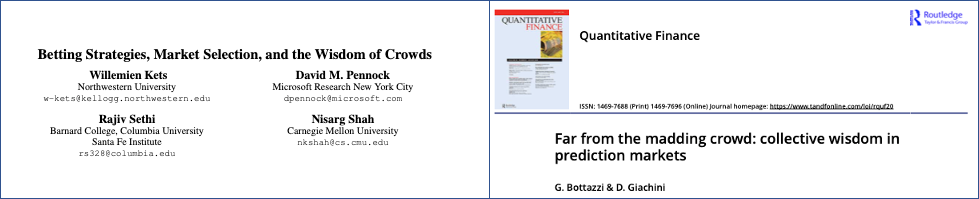

In [40]:
from IPython.display import Image, display
img=Image(filename='images/bettingMarket.png',width=1000)
display(img)

We are going to model a market with 2 agents which place one bet per iteration
* __Event__
  * We observe the event `evt` 
  * At every iteration, `evt` might happen or not according to a secret probability `pEvent`
* __Agents__
  * Each agent has an initial amount of money, or `wealth`
  * At every iteration, each agent places bets on the realization (happening) of `evt` or on its 'not realization'
  * Each agent decides on what to bet, and how much to bet, depending on some factors
    * _What to bet_: Each agent has an opinion about the probability of `evt`, stored in the attribute `belief`
    * _How much to bet_: All agents share a common _propensity to bet_ `bet_propensity`
        * It is a value from 0 to 1
        * The higher is this value, the higher percentage of wealth agents will bet
* __Bets__
  * At every iteration, the market computes the unitary price (from 0 to 1) for betting on the realization of `evt`, `priceT`
  * The price of betting on the non-realization of `evt` is `1-priceT`

We begin defining the agents placing bets

## A class for agents

In [42]:
class Agent:
    def __init__(self,w,b):
        self._wealth=w #my current amount of money
        self._belief=b #my belief on the probability of evt
        
    def get_wealth(self):
        return self._wealth
        
    def get_belief(self):
        return self._belief
    
    def normalize_wealth(self,totW):
        if(totW!=0):
            self._wealth=self._wealth/totW
    
    #evtT=true: 
    #    evt realized at time t
    #bet_propensity:
    #    Propensity to bet in [0,1]. 
    #    The higher the value, the higher the % of wealth that agents will bet
    #priceT:
    #    Price to place a bet 'evt realizes'
    #    The bet is a contract which pays 1 if evt happens
    #1-priceT:
    #    Price to place a bet 'evt does not realize'
    #    The bet is a contractt which pays 1 if evt does not happen
    
    def update_wealth(self,evtT,bet_propensity,priceT):
        portfolio=0
        if evtT:
            if priceT!=0 :    
                #I encode the fact that the agent placed a bet on the event happening
                #  strategy is the % of wealth bet on the event happening
                #  This is an example of so-called fractional Kelly strategy
                #    (1-bet_propensity)*priceT is the part of wealth I want to keep safe in my pocket :D
                #    bet_ropensity*self.belief is how much I want to bet 
                strategy = (1 - bet_propensity)*priceT + bet_propensity*self._belief
                #Numerator  : how much wealth I bet
                #Denumerator: prize of the bet/contract
                #portfolio: number of bets/contracts bought
                portfolio = strategy*self._wealth/priceT
        else:
            if 1-priceT != 0 :
                strategy = (1 - bet_propensity)*(1-priceT) + bet_propensity*(1-self._belief)
                portfolio = strategy*self._wealth/(1-priceT)   
        #My new wealth is the portfolio itself. Because: 
        #  Each contract/bet pays 1. 
        #  My wealth saved in the pocket is included in the portfolio.
        self._wealth= portfolio

The following checks are present only to avoid divisions by zero. 
* `if priceT!=0 :`
* `if 1 - priceT != 0 :`

They make the code less intuitive. 
* We could have chosen a different implementation where this is more explicit

In [43]:
class AgentWithException(Agent):
    
    def update_wealth(self,evtT,bet_propensity,priceT):
        portfolio=0
        try:
            if evtT:
                #I encode the fact that the agent placed a bet on the event happening
                #  strategy is the % of wealth bet on the event happening
                #  This is an example of fractional Kelly strategy
                #    (1-betPropensity)*pt is the part of wealth I want to keep safe in my pocket :D
                #    betPropensity*self.belief is how much I want to bet
                strategy = (1 - bet_propensity)*priceT + bet_propensity*self._belief
                #Numerator  : how much wealth I bet
                #Denumerator: prize of the bet/contract
                #portfolio: number of bets/contracts bought
                portfolio = strategy*self._wealth/priceT
            else:
                strategy = (1 - bet_propensity)*(1-priceT) + bet_propensity*(1-self._belief)
                portfolio = strategy*self._wealth/(1-priceT)   
        except ZeroDivisionError:
            portfolio=0
        #My new wealth is the portfolio itself. Because: 
        #  Each contract/bet pays 1. 
        #  My wealth saved in the pocket is included in the portfolio.
        self._wealth= portfolio

## A class for the Market

We can now define the market

In [44]:
import random

class Market:
    def __init__(self,betPropensity,pEvent,agents,seed):
        self._bet_propensity=betPropensity
        self._pEvent=pEvent
        self._agents=agents
        self._t=0
        self._priceT=0
        self._evtT=False
        random.seed(seed)
        
    def perform_one_step(self):
        self._t+=1
        self._update_aggregate_measures()
        self._sample_global_probabilistic_variables()
        self._update_agents()
        self._normalize_agents_measures()
        
    def _update_aggregate_measures(self):
        self._priceT=0
        for agent_i in self._agents:
            self._priceT += agent_i.get_belief()*agent_i.get_wealth()
        #print('New priceT',self.priceT)
            
    def _sample_global_probabilistic_variables(self):
        self._evtT = (random.random() <= self._pEvent)
        #if self.evtAtT:
        #    print('!!!evt happened!!!')
        
    def _update_agents(self):
        for agent in self._agents:
            agent.update_wealth(self._evtT,self._bet_propensity,self._priceT)
        
    def _normalize_agents_measures(self):
        totW = 0;
        for agent in self._agents:
            totW += agent.get_wealth()
        for agent in self._agents:
            agent.normalize_wealth(totW);
            
    def __str__(self):
        descr = 't='+str(self._t)
        descr+= ' priceT='+str(round(self._priceT,2))+"\n  "
        for i in range(len(self._agents)):
            w=str(round(self._agents[i].get_wealth(),2))
            descr+=" w"+str(i)+"="+w
        return descr

## Let's run a simulation

Let's create a Market instance, and perform some simulations

In [47]:
seed=3
bet_propensity=0.5
pEvent=0.65

initW=[0.5,0.5]
beliefs=[0.8,0.4]
agents=[Agent(initW[0],beliefs[0]),Agent(initW[1],beliefs[1])]

market = Market(bet_propensity,pEvent,agents,seed)

print('Initially')
print(market)
print()

# for step in range(35):
#     print('Step',str(step+1))
#     market.perform_one_step()
#     print(market)

for step in range(100000):
    market.perform_one_step()
print(market)
print()

Initially
t=0 priceT=0
   w0=0.5 w1=0.5

t=100000 priceT=0.65
   w0=0.69 w1=0.31



## A special Noise trader

Let us now consider a so-called _Noise trader_
* One agent takes decisions using _uninformative data_ 
* A more precise definition can be found [here](https://www.sciencedirect.com/topics/economics-econometrics-and-finance/noise-trading)
>  Noise traders trade on the basis of what they falsely believe to be special information or misinterpret useful information concerning the future price or payoffs of a risky asset.

We are going to consider a noise trader who changes his/her belief before every bet...
* according to what the horoscope says :D

In [49]:
class NoiseTraderAgent(Agent):
    def _consult_horoscope(self):
        self._belief = random.random()
        #print('The horoscope tells me',self.belief)
        
    def update_wealth(self,evtT,bet_propensity,priceT):
        self._consult_horoscope()
        super().update_wealth(evtT,bet_propensity,priceT)

Let's run the same model
* where we replace the second Agent with a NoiseTraderAgent

In [50]:
seed=3 
bet_propensity=0.5
pEvent=0.65

initW=[0.5,0.5]
beliefs=[0.8,0.4]

agents=[Agent(initW[0],beliefs[0]),NoiseTraderAgent(initW[1],beliefs[1])]
market = Market(bet_propensity,pEvent,agents,seed)

print('Initially')
print(market)
print()

# for step in range(35):
#     print('Step',str(step+1))
#     market.perform_one_step()
#     print(market)

for step in range(100000):
    market.perform_one_step()
print(market)

Initially
t=0 priceT=0
   w0=0.5 w1=0.5

t=100000 priceT=0.8
   w0=1.0 w1=0.0


## Anyone interested on a tesina/tesi on ABM modeling and analysis!?
__Just contact us!__